In [1]:
#LIBS to be used 

from MDPlus.core import Fasu, Cofasu
from MDPlus.analysis import pca
import numpy as np
import os

import matplotlib.pyplot as plt
%matplotlib inline

#getting details automatically from files
import glob
import csv
import pandas as pd
import time

#saving data 
import pickle


(103125, 58, 3)


/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:18: RuntimeWarning: divide by zero encountered in log
/home/feb23/Documents/jha/extasy/extasy-tools/lib/python2.7/site-packages/ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


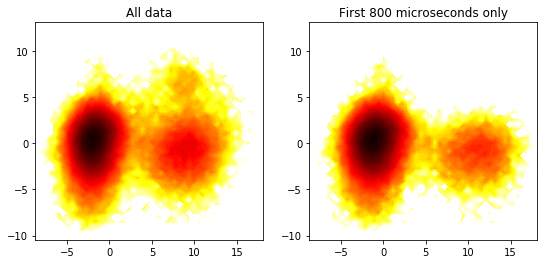

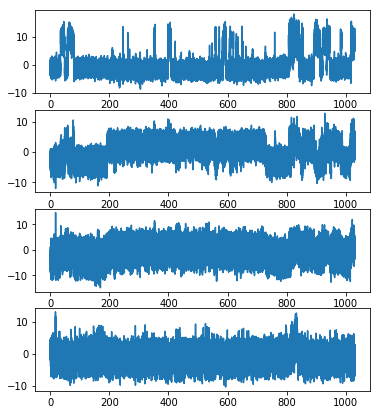

In [2]:
# DE SHAW DATA
f = Fasu('../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca_1ms_dt10ns.xtc',
         top='../bpti/extasy-bpti/Shaw_Data_Analysis/bpti_ca.pdb')#,selection='name CA') #note that analysis fails when use selection='name CA'
c = Cofasu(f)

print c.shape # This should give 103125 snapshots, each of 58 atoms, each with three (x,y,z) coordinates
p = pca.fromtrajectory(c)

DE_plot = 1

if DE_plot == 1:
# The rare event can be seen at about 820 microseconds in PC4. A 2-D plot in the PC1/PC4 space works well, 
# see the spot at (-10, 7):
    plt.figure(figsize=(9, 4))
    plt.subplot(1,2,1)
    z,x,y = np.histogram2d(1.0*p.projs[0],p.projs[3], bins=50)
    DEshaw = [x,y,z]
    F = -np.log(z)
    extent = [x[0], x[-1], y[0], y[-1]]
    plt.title('All data')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    plt.subplot(1,2,2)
    z,x,y = np.histogram2d(p.projs[0][:80000],p.projs[3][:80000], bins=50)
    F = -np.log(z)
    plt.title('First 800 microseconds only')
    plt.contourf(F.T, 50, cmap=plt.cm.hot, extent=extent)
    # note sure why these plots come out flipped right to left compared to plots prof Laughton supplied 
    
    
    # In this cell we plot the time series for the trajectory projected along each of the 1st four PCs
    plt.figure(figsize=(6, 7))
    time = np.arange(len(c)) / 100.0
    plt.subplot(4,1,1)
    plt.plot(time, p.projs[0])
    plt.subplot(4,1,2)
    plt.plot(time, p.projs[1])
    plt.subplot(4,1,3)
    plt.plot(time, p.projs[2])
    plt.subplot(4,1,4)
    plt.plot(time, p.projs[3])

In [3]:
#######################################################################

#######################################################################

# USER INPUTS ONLY THE DIR
#dirname = "p07e01_k12_00010_k34_00100"
dirname = "p07e01_k12_01000_k34_01000_mdtx2"


# no need to touch
cu = 20 
iters = 20
cores = 200
top = '../bpti/old_gits/test_git_dev/gmxcoco-bpti/inp_files/bpti.gro'
atm = '/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/'

folder = dirname+"/"

path_to_zip = glob.glob(atm+folder+'zip.rp*-pilot.0000')
print path_to_zip
print type(path_to_zip)
print path_to_zip[0].split("/")[-1]
print path_to_zip[0].split("/")[-1].split("-pilot.0000")

rpname = str(path_to_zip[0].split("/")[-1].split("-pilot.0000")[0])

#rpname = "zip.rp.session.js-17-65.jetstream-cloud.org.hal9000.017386.0003"
zipfolder = rpname+ '-pilot.0000/'
#prj = 'p07e01_k12_01000_k34_01000_4d/zip.rp.session.js-17-65.jetstream-cloud.org.hal9000.017386.0003-pilot.0000/'
prj = folder + zipfolder
#tar = '/zip.rp.session.js-17-65.jetstream-cloud.org.hal9000.017372.0005-pilot.0000/'
path   = atm+prj
pathSt = atm+prj+"staging"
pathCu = atm+prj+"cu009"
#print path







['/home/feb23/Documents/jha/extasy/bpti/atmosphere_rsync/p07e01_k12_01000_k34_01000_mdtx2/zip.rp.session.js-17-65.jetstream-cloud.org.hal9000.017386.0002-pilot.0000']
<type 'list'>
zip.rp.session.js-17-65.jetstream-cloud.org.hal9000.017386.0002-pilot.0000
['zip.rp.session.js-17-65.jetstream-cloud.org.hal9000.017386.0002', '']


In [4]:
# want to grab info from dir files to double check self

# get details from gmxcoco.wcfg

# get details from run[123].mdp
    # details about iters and steps and stuff
    # details about total simulated protein time 

# automatically get zip.rp.* file name?

# check in side zip.* for number of files so can tell automatically iters so will automaticaly know correct numbers to use
    # do this with string of file name and then does file exist os.path.filesometingcommand
    
# automatically get run time and performance details from *.csv files
    # routine to read in data and do bar graph plots or something?

In [5]:
##############################################################################################
# Automated grab data from dir - START
##############################################################################################

In [6]:
# get details from gmxcoco.wcfg
print "#########################################"
print  "#              gmxcoco.wcfg details        #"
print  "########################################"

wsplit = []
path_to_gmxcoco=atm+folder+"/gmxcoco.wcfg"    
e=open(path_to_gmxcoco,"r")
#print e.readlines()
w = e.readlines()
e.close()
#for i in range(len(w)):
    #print i
    #print w[i]
gmxcocolines = [5, 7, 12, 28, 31  ]
for i in range(len(gmxcocolines)):
    print w[gmxcocolines[i]]
    #print w[gmxcocolines[i]].split()
    wsplit.append(w[gmxcocolines[i]].split())
    
    
#print wsplit[0][2]
#print wsplit[1][2]


iters = int(wsplit[0][2])
cu = int(wsplit[1][2])

#########################################
#              gmxcoco.wcfg details        #
########################################
num_iterations 	= 20                # Number of iterations of Simulation-Analysis

num_CUs   	= 20                # Number of tasks or Compute Units

num_cores_per_sim_cu = 20      # set from 24 to 20 for supermic  Number of cores per Simulation Compute Unit

grompp_1_itp_file    = './inp_files/posre_ca_100.itp'  # Entire path to ITP file

grompp_2_itp_file    = './inp_files/posre_ca_1000.itp' # Entire path to ITP file



In [7]:
print "#########################################"
print  "#              run1.mdp details        #"
print  "########################################"
    
##### read RUN1.mdp ######
path_to_run1=atm+folder+ "inp_files/"+"run1.mdp"    
e=open(path_to_run1,"r")
#print e.readlines()
w = e.readlines()
e.close()
#for i in range(len(w)):
    #print i
    #print w[i]
#lines = [9] #, 7, 12, 28, 31  ]
print w[4]
print w[9]
print w[10]

run1 = []
run1.append(w[9].split())
run1.append(w[10].split())
#print run1[0]
#print run1[1]
print 'total equilibrum time =', float(run1[0][2])*float(run1[1][2])

#########################################
#              run1.mdp details        #
########################################
define          = -DPOSRES_CA_100

emstep          = 0.01

nsteps          = 1000

total equilibrum time = 10.0


In [8]:

print "#########################################"
print  "#              run2.mdp details        #"
print  "########################################"

##### read RUN2.mdp ######
path_to_run2=atm+folder+ "inp_files/"+"run2.mdp"    
e=open(path_to_run2,"r")
#print e.readlines()
w = e.readlines()
e.close()
#for i in range(len(w)):
    #print i
    #print w[i]
lines = [9, 10, 15, 16] # 7, 12, 28, 31  ]
for i in range(len(lines)):
    print w[lines[i]]

run2 = []
run2.append(w[9].split())
#run2.append(w[10].split())
run2.append(w[15].split())
run2.append(w[16].split())
#print run2[0]
#print run2[1]
#print run2[2]
print 'total restrained MD time is =', float(run2[1][2])*float(run2[2][2])

#########################################
#              run2.mdp details        #
########################################
define                   = -DPOSRES_CA_1000



dt                       = 0.002

nsteps                   = 5000

total restrained MD time is = 10.0


In [9]:
print "#########################################"
print  "#              run3.mdp details        #"
print  "########################################"


##### read RUN3.mdp ######
path_to_run3=atm+folder+ "inp_files/"+"run3.mdp"    
e=open(path_to_run3,"r")
#print e.readlines()
w = e.readlines()
e.close()
#for i in range(len(w)):
    #print i
    #print w[i]
lines = [ 16, 17 ] # 7, 12, 28, 31  ]
for i in range(len(lines)):
    print w[lines[i]]

run3 = []
#run3.append(w[9].split())
#run2.append(w[10].split())
run3.append(w[16].split())
run3.append(w[17].split())
#print run3[0]
#print run3[1]
#print run3[2]
print 'total unrestrained MD time is =', float(run3[0][2])*float(run3[1][2])

#########################################
#              run3.mdp details        #
########################################
dt                       = 0.002

nsteps                   = 100000

total unrestrained MD time is = 200.0


In [10]:
################ summary of simulated time by kernels ###############

In [11]:
###############################################################################################
# Automated grab data from dir - END
###############################################################################################



In [12]:
###############################################################################################
# FASU AND COFASU - START 
###############################################################################################

def run_fasu_tot(l,path,top,cu,iters,fileprefix,fileExt,offset=0):
    offset=0
    for i in range(0,iters):
        for k in range(cu):                
            string = path+"/"+fileprefix+"-"+str(i)+"_"+str(k)+fileExt
            ss = path+"/"
            if(fileprefix=="coco_out"):
                string = path+"/"+fileprefix+"_"+str(i)+"_"+str(k)+fileExt
            #str_list[i][k] = string
            #print string
            if(os.path.isfile(string)==True):
                #print string
                l[i][k] = Fasu(string,top=top, selection='name CA')
    return l;

def cofasu_flex_tot(cByIters,l,offset=0):
    l_row = []

    for i in range(0,len(l)): #[4, 9, 14, 19]
        
        for j in range(len(l[i])):
            l_row.append(l[i][j])
        #print l_row
    cByIters[i] = Cofasu(l_row)
        
    return cByIters;

def plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,cap,offset=0):
    title=prj+" all                "+fileprefix+"*"+fileExt
    pByIters = []
    for i in range(iters-1,iters):
        #print "i is =",i
        p14i4 = []
        p14i4T = []
        for j in range(len(cByIters[i])):
            #print "j is =", j
            p14i4.append(p.map(cByIters[i][j])[[0,3]])
        p14i4T = np.array(p14i4).T
        pByIters.append(p14i4T) 
    fig = plt.figure()
    plt.xlim((-15, 20))
    plt.ylim((-11, 15))
    plt.title(title)
    fig.text(-0.1,-0.2,cap)
    plt.plot(p.projs[0],p.projs[3], 'b.')
    for i in range(len(pByIters)):
        #print i
        plt.plot(pByIters[i][0] , pByIters[i][1] , 'y.')
    return pByIters;

def save_object_prefix(obj, atm, dirname,fileprefix):
    filename = dirname+"_"+fileprefix+".pkl"
    with open(atm+dirname+"/"+filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)

def load_object_prefix( atm, dirname, fileprefix):
    filename = dirname+"_"+fileprefix+".pkl"
    with open(atm+dirname+"/"+filename, 'rb') as datainput:
        k = pickle.load(datainput)
        return k;        
        

    
def save_object(obj, filename, atm, folder):
    with open(atm+folder+filename, 'wb') as output:
        pickle.dump(obj, output, pickle.HIGHEST_PROTOCOL)
        
def load_object(filename, atm, folder):
    with open(atm+folder+filename, 'rb') as datainput:
        k = pickle.load(datainput)
        #pickle.load(obj, datainput, pickle.HIGHEST_PROTOCOL)
        print "post D load "
        #print obj.shape
        return k;

In [13]:
#################################################################
# FASU AND COFASU OPERATIONS ARE DONE HERE
# RESULTS ARE SAVED TO FILES USING SAVE OBJECT TO AVOID RE RUNNING ON IPYNB RESTART
# SET doCoFasu==0 if COFASU results already exist for the dir of interest
#################################################################


doCoFasu = 0
if doCoFasu==1:
    l = np.empty((iters,cu),dtype=object) 
    offset=0

# COLLECT FASU and COFASU DATA
# same thing that Prof. Laughton did in his example analysis files from the github just I had to make
# minor changes for the different settings and made a function so it was easier to automate analysis 

# Fasu and Cofasu of the md-[0-iters]_[0-cu].xtc files - so can compare data in PCA space vs DE Shaw data
    fileExt = '.xtc'
    fileprefix = 'md'
    run_fasu_tot( l, pathSt, top, cu, iters, fileprefix, fileExt,offset);
    cByIters = [[0 for i in range(cu)] for j in range(iters)]
    cofasu_flex_tot(cByIters,l,offset);
    filename = dirname+"_"+fileprefix+".pkl"
    save_object(cByIters,filename,atm,folder)
# Fasu and Cofasu of the coco_out_[0-iters]_[0-cu].gro files 
# so we can see where coco generated strucutres fall in the PCA space compared to the 
# final results of the full workflows, md-[0-iters]_[0-cu].xtc
# This will let us see how far the bpti.gro strucutre is "pulled" towards the coco generated strucutures
    fileExt = '.gro'
    fileprefix = 'coco_out'
    run_fasu_tot( l, pathSt, top, cu, iters, fileprefix, fileExt,offset);
    coco_cByIters = [[0 for i in range(cu)] for j in range(iters)]
    cofasu_flex_tot(coco_cByIters,l,offset);
    filename = dirname+"_"+fileprefix+".pkl"
    save_object(cByIters,filename,atm,folder)
# # Fasu and Cofasu of the eq-[0-iters]_[0-cu].gro files ( the output files of kernel 4 )
# Since this is the output of K4 it is the end of the "pull bpti.gro towards coco structure"
# part of the code. Should let us evaluate how effective using stronger spring constants
# or longer times, to pull bpti.gro towards the coco strucutres 
    fileExt = '.gro'
    fileprefix = 'eq'
    run_fasu_tot( l, pathSt, top, cu, iters, fileprefix, fileExt,offset);
    eq_cByIters = [[0 for i in range(cu)] for j in range(iters)]
    cofasu_flex_tot(eq_cByIters,l,offset);
    filename = dirname+"_"+fileprefix+".pkl"
    save_object(cByIters,filename,atm,folder)
else:
# COLLECT FASU and COFASU DATA
# same thing that Prof. Laughton did in his example analysis files from the github just I had to make
# minor changes for the different settings and made a function so it was easier to automate analysis 

# Fasu and Cofasu of the md-[0-iters]_[0-cu].xtc files - so can compare data in PCA space vs DE Shaw data
    fileExt = '.xtc'
    fileprefix = 'md'
    #cByIters = [[0 for i in range(cu)] for j in range(iters)]
    filename = dirname+"_"+fileprefix+".pkl"
    cByIters = load_object(filename,atm,folder)
# Fasu and Cofasu of the coco_out_[0-iters]_[0-cu].gro files 
# so we can see where coco generated strucutres fall in the PCA space compared to the 
# final results of the full workflows, md-[0-iters]_[0-cu].xtc
# This will let us see how far the bpti.gro strucutre is "pulled" towards the coco generated strucutures
    fileExt = '.gro'
    fileprefix = 'coco_out'
    #coco_cByIters = [[0 for i in range(cu)] for j in range(iters)]
    filename = dirname+"_"+fileprefix+".pkl"
    coco_cByIters = load_object(filename,atm,folder)
# # Fasu and Cofasu of the eq-[0-iters]_[0-cu].gro files ( the output files of kernel 4 )
# Since this is the output of K4 it is the end of the "pull bpti.gro towards coco structure"
# part of the code. Should let us evaluate how effective using stronger spring constants
# or longer times, to pull bpti.gro towards the coco strucutres 
    fileExt = '.gro'
    fileprefix = 'eq'
    #eq_cByIters = [[0 for i in range(cu)] for j in range(iters)]
    filename = dirname+"_"+fileprefix+".pkl"
    eq_cByIters = load_object(filename,atm,folder)

post D load 
post D load 
post D load 


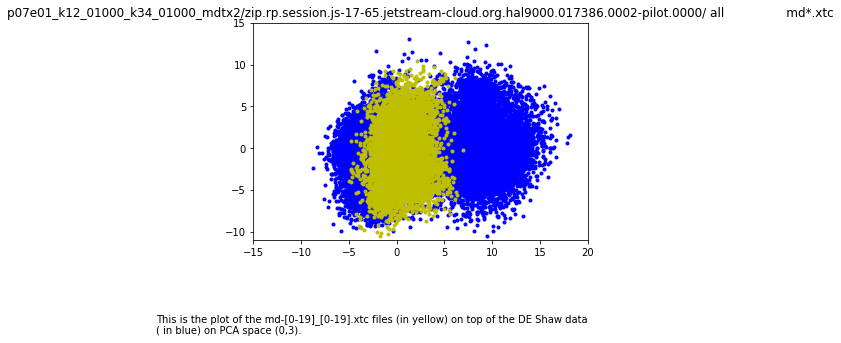

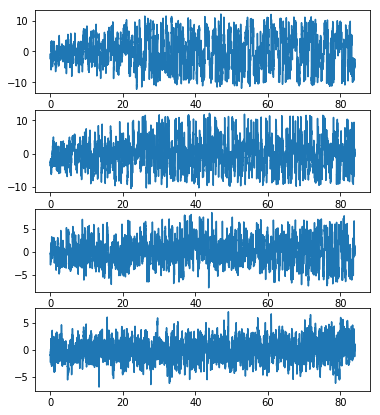

In [14]:
#PLOTTING DATA IN PCA SPACE
fileExt = '.xtc'
fileprefix = 'md'
cap ='''
This is the plot of the md-[0-19]_[0-19].xtc files (in yellow) on top of the DE Shaw data
( in blue) on PCA space (0,3). '''

pByIters = plot_cofasu_tot(p,cByIters,iters,prj,fileprefix,fileExt,cap)

# In this cell we plot the time series for the trajectory projected along each of the 1st four PCs
plt.figure(figsize=(6, 7))
time = np.arange(len(cByIters[19]))/100.0  # need to use output freq and time units size to convert
                                           # to the same time scale as DE Shaw data. 
reqe = 6
# our data 
xtc_p = pca.fromtrajectory(cByIters[19],req_evecs=reqe)
plt.subplot(4,1,1)
plt.plot(time, xtc_p.projs[0])
plt.subplot(4,1,2)
plt.plot(time, xtc_p.projs[1])
plt.subplot(4,1,3)
plt.plot(time, xtc_p.projs[2])
plt.subplot(4,1,4)
plt.plot(time, xtc_p.projs[3])

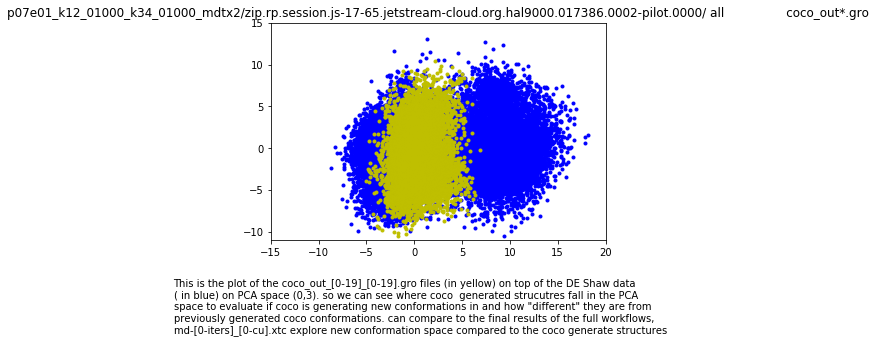

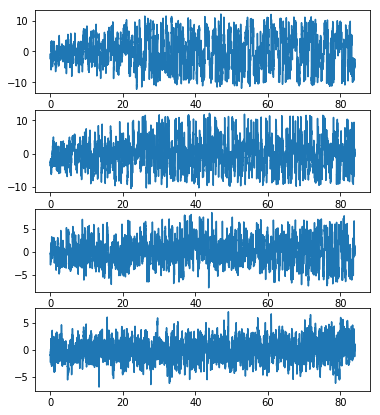

In [15]:
fileExt = '.gro'
fileprefix = 'coco_out'
cap ='''
This is the plot of the coco_out_[0-19]_[0-19].gro files (in yellow) on top of the DE Shaw data 
( in blue) on PCA space (0,3). so we can see where coco  generated strucutres fall in the PCA 
space to evaluate if coco is generating new conformations in and how "different" they are from
previously generated coco conformations. can compare to the final results of the full workflows,
md-[0-iters]_[0-cu].xtc explore new conformation space compared to the coco generate structures'''
coco_pByIters = plot_cofasu_tot(p,coco_cByIters,iters,prj,fileprefix,fileExt,cap)

# In this cell we plot the time series for the trajectory projected along each of the 1st four PCs
plt.figure(figsize=(6, 7))
time = np.arange(len(coco_cByIters[19]))/100.0  # need to use output freq and time units size to convert
                                           # to the same time scale as DE Shaw data. 
reqe = 6
# our data 
coco_p = pca.fromtrajectory(coco_cByIters[19],req_evecs=reqe)
plt.subplot(4,1,1)
plt.plot(time, coco_p.projs[0])
plt.subplot(4,1,2)
plt.plot(time, coco_p.projs[1])
plt.subplot(4,1,3)
plt.plot(time, coco_p.projs[2])
plt.subplot(4,1,4)
plt.plot(time, coco_p.projs[3])

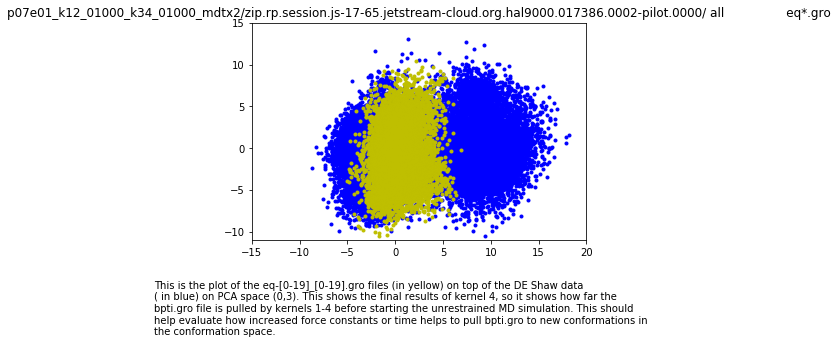

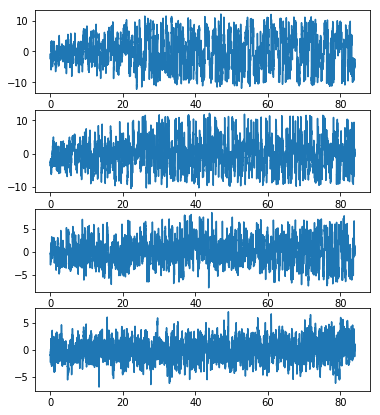

In [16]:
fileExt = '.gro'
fileprefix = 'eq'
cap = '''This is the plot of the eq-[0-19]_[0-19].gro files (in yellow) on top of the DE Shaw data 
( in blue) on PCA space (0,3). This shows the final results of kernel 4, so it shows how far the 
bpti.gro file is pulled by kernels 1-4 before starting the unrestrained MD simulation. This should
help evaluate how increased force constants or time helps to pull bpti.gro to new conformations in 
the conformation space.'''

eq_pByIters = plot_cofasu_tot(p,eq_cByIters,iters,prj,fileprefix,fileExt, cap)

# In this cell we plot the time series for the trajectory projected along each of the 1st four PCs
plt.figure(figsize=(6, 7))
time = np.arange(len(eq_cByIters[19]))/100.0  # need to use output freq and time units size to convert
                                           # to the same time scale as DE Shaw data. 
reqe = 6
# our data 
eq_p = pca.fromtrajectory(eq_cByIters[19],req_evecs=reqe)
plt.subplot(4,1,1)
plt.plot(time, eq_p.projs[0])
plt.subplot(4,1,2)
plt.plot(time, eq_p.projs[1])
plt.subplot(4,1,3)
plt.plot(time, eq_p.projs[2])
plt.subplot(4,1,4)
plt.plot(time, eq_p.projs[3])

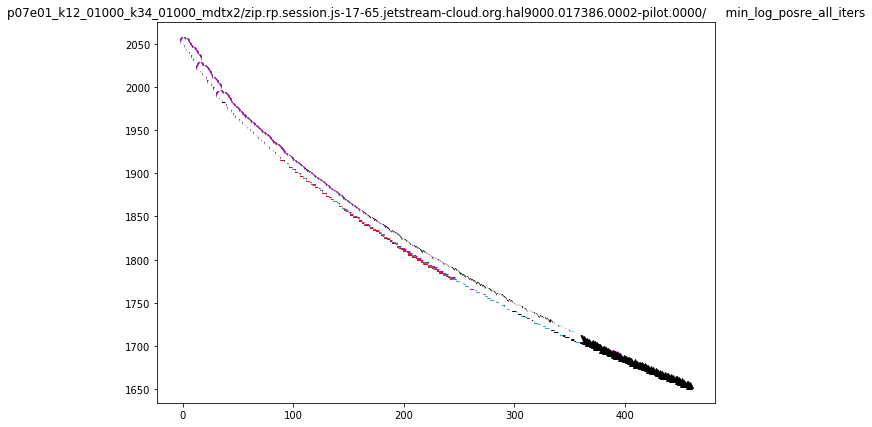

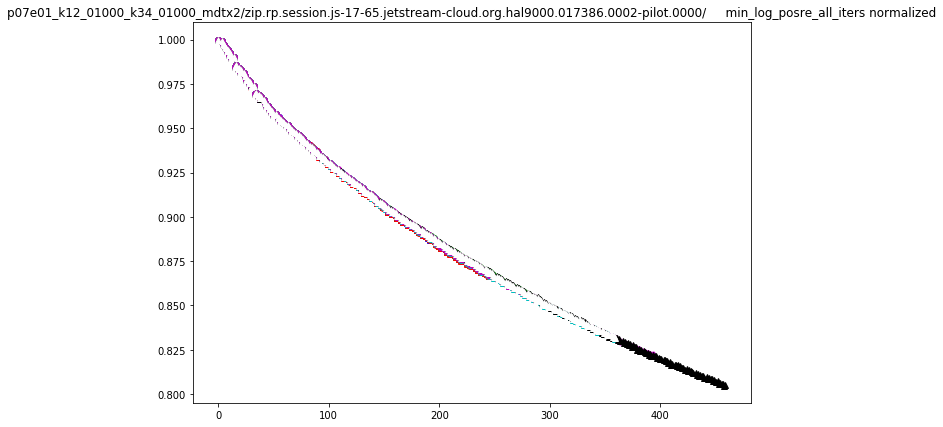

In [17]:
#################### analysis of min*.log                   #####################
# Position restraint energy vs time data 
#################################################################################

#################### min analysis function                ########################

def min_log_posre_all_iters(N,iters,pathCu,prj,normal='raw'):
    for h in range(1,iters-1):
        #data=fileprefix+str(h)+"_9.log"
        data="min-"+str(h)+"_9.log"
        fi=pathCu+"/"+data
        e=open(fi,"r")
        #print e.readlines()
        w = e.readlines()
        e.close()
        #M = []
        q=w[358].split()
        z=w[362].split()
        mtx= []
        m = []
        k=0
        for i in range(len(w)):
            if(w[i-1].split()==q and w[i+3].split()==z):

                mtx = []
                k=k+1
                l1=w[i].split()
                l2=w[i+4].split()
                l3=w[i+6].split()
                l4=w[i+8].split()
                #print l1,l2,l3,l4
                #mtx.append(k)
                #m.append(mtx)
                for i1 in range(len(l1)):
                    mtx.append(l1[i1])
                for i2 in range(len(l2)):
                    mtx.append(l2[i2])
                for i3 in range(len(l3)):
                    mtx.append(l3[i3])
                for i4 in range(len(l4)):
                    mtx.append(l4[i4])
                m.append(mtx)
        N.append(m)
        
    #cul=['b.','g.','r.','c.','m.','y.','k.','w.','b^','g^','r^','c^','m^','y^','k^','w^','bo','go','ro','co','mo','y--','k^','w^']
    #cul=['b.','g.','r.','c.','m.','b^','g^','r^','c^','m^','bo','go','ro','co','mo','y--','k^','w^']
    cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']

    plt.figure(figsize=(10,7))
    #plt.xlim((0, 5000))
    #plt.ylim((0, 200))
    if normal=='normalize':
        plt.title(prj+"     "+"min_log_posre_all_iters"+ " "+'normalized')
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(N)):
            for i in range(len(N[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(N[lm][i][0]),float(N[lm][i][11])/float(N[lm][0][11]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    else:
        plt.title(prj+"     "+"min_log_posre_all_iters")
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(N)):
            for i in range(len(N[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(N[lm][i][0]),float(N[lm][i][11]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    return N;



#################### analysis of min*.log                   #####################
# Position restraint energy vs time data 
#################################################################################


# plots of position restrain energy change over time for K1/K2 
# uses min-[0-19]_9.log for plotting. 
N=[]
# plots raw pos res energy 
# x axis is time steps and y axis is KJ/mol
min_log_posre_all_iters(N,iters,pathCu,prj);
N=[]
# plots pos res energy normalized by the pos res energy at step=0
# x axis is time steps and y axis is KJ/mol
min_log_posre_all_iters(N,iters,pathCu,prj,'normalize');

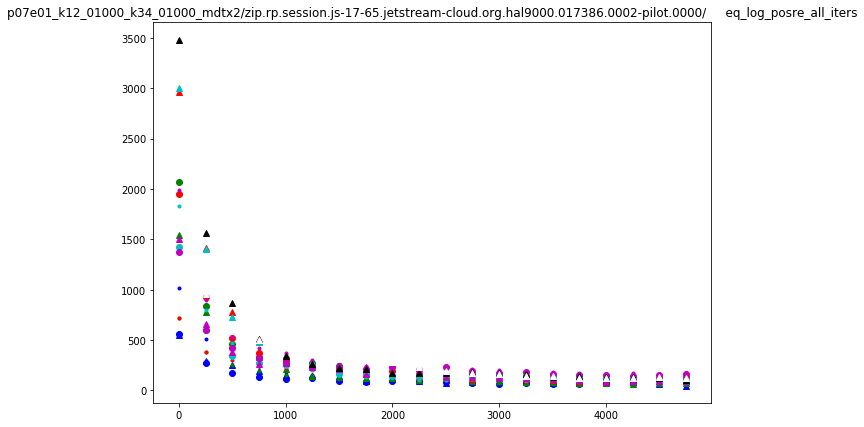

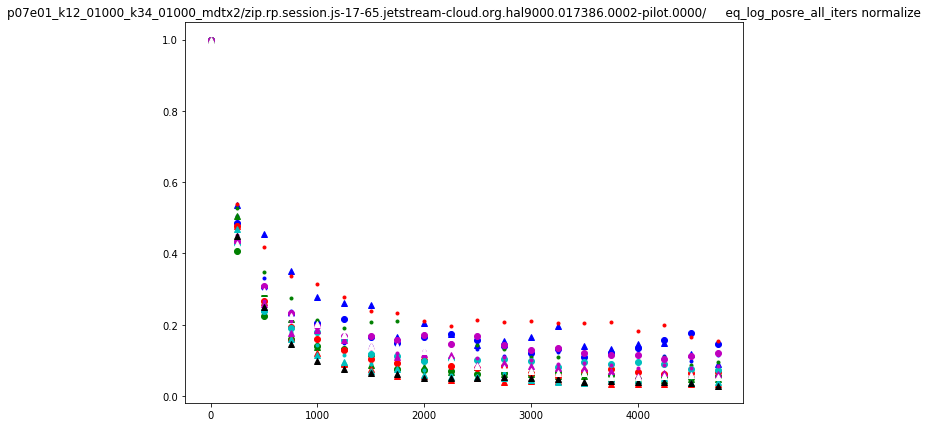

In [18]:
#################### analysis of eq*.log                   #####################
# Position restraint energy vs time data 
#################################################################################

#################### eq analysis function                ########################

def eq_log_posre_all_iters(M,iters,pathCu,prj,normal='raw'):
    for h in range(1,iters-1):
        #data=fileprefix+str(h)+"_9.log"
        data="eq-"+str(h)+"_9.log"
        fi=pathCu+"/"+data
        e=open(fi,"r")
        #print e.readlines()
        w = e.readlines()
        e.close()
        #M = []
        q=w[399].split()
        mtx= []
        m = []
        k=0
        for i in range(len(w)):
            if(w[i-1].split()==q):
                mtx = []
                k=k+1
                l1=w[i].split()
                l2=w[i+4].split()
                l3=w[i+6].split()
                l4=w[i+8].split()
                #print l1,l2,l3,l4
                #mtx.append(k)
                #m.append(mtx)
                for i1 in range(len(l1)):
                    mtx.append(l1[i1])
                for i2 in range(len(l2)):
                    mtx.append(l2[i2])
                for i3 in range(len(l3)):
                    mtx.append(l3[i3])
                for i4 in range(len(l4)):
                    mtx.append(l4[i4])
                m.append(mtx)
        M.append(m)


    #cul=['b.','g.','r.','c.','m.','y.','k.','w.','b^','g^','r^','c^','m^','y^','k^','w^','bo','go','ro','co','mo','y--','k^','w^']
    #cul=['b.','g.','r.','c.','m.','b^','g^','r^','c^','m^','bo','go','ro','co','mo','y--','k^','w^']
    cul=['b.','b^','bo','g.','g^','go','r.','r^','ro','c.','c^','co','m.','m^','mo','y--','k^','w^']

    plt.figure(figsize=(10,7))
    #plt.xlim((0, 5000))
    #plt.ylim((0, 2))
    if normal=='normalize':
        plt.title(prj+"     "+"eq_log_posre_all_iters"+" "+'normalize')
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(M)):
            for i in range(len(M[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(M[lm][i][0]),float(M[lm][i][11])/float(M[lm][0][11]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    else:
        plt.title(prj+"     "+"eq_log_posre_all_iters")
        #plt.plot(float(m[7][0]),float(m[7][11]),'go')
        for lm in range(len(M)):
            for i in range(len(M[lm])-1):#len(m[0])):
                #print i,j
                #print m[i][0], m[i][11]
                plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
                #plt.plot(float(M[lm][i][0]),float(M[lm][i][11]),cul[lm])
    return M;



#################### eq analysis               ########################


# plots of position restrain energy change over time for K3/K4 
# uses eq-[0-19]_9.log for plotting. 
M = []
# plots raw pos res energy 
# x axis is time steps and y axis is KJ/mol
eq_log_posre_all_iters(M,iters,pathCu,prj);
M = []
# plots pos res energy normalized by the pos res energy at step=0
# # x axis is time steps and y axis is KJ/mol
eq_log_posre_all_iters(M,iters,pathCu,prj,'normalize');

In [19]:
############################################################################################
# EIGAN VALUE AND VECTOR ANALYSIS SECTION STARTS HERE ######################################
############################################################################################

In [20]:
#PCA EVALS - GIVES IMPORTANCE OF axis for variance

class prettyfloat(float):
    def __repr__(self):
        return "%.3f" % self

#nice = map(prettyfloat,kavgsnorm)
#print nice



print "DE shaw p.evals"
de_p = pca.fromtrajectory(c,req_evecs=reqe)
print cByIters[19].shape
print map(prettyfloat,de_p.evals) 
print " "


#print "****************"
#print "our data pp.evals"
#print "****************"

print "cByIters - PCA results for md-[0-19]_[0-19].xtc files "
print cByIters[19].shape
print map(prettyfloat,xtc_p.evals)
print " "

print "coco_cByIters - PCA results for coco_out_[0-19]_[0-19].gro files"
print coco_cByIters[19].shape
print map(prettyfloat,coco_p.evals)
print " "

print "eq_cByIters - PCA results for eq-[0-19]_[0-19].gro files"
print eq_cByIters[19].shape
print map(prettyfloat,eq_p.evals)
print " "


# goal of this section is to just show how variance is captured by PCA in DE Shaw data 
# and our data. For use the first 5 PCA axis are the most important. Wanted to see 
# if variance was different in the three files and how they compare to variance in 
# the DE Shaw data. 

DE shaw p.evals
(8400, 58, 3)
[17.040, 10.252, 10.172, 4.824, 3.772, 2.909]
 
cByIters - PCA results for md-[0-19]_[0-19].xtc files 
(8400, 58, 3)
[22.436, 14.374, 6.162, 3.340, 2.225, 1.811]
 
coco_cByIters - PCA results for coco_out_[0-19]_[0-19].gro files
(8400, 58, 3)
[22.436, 14.374, 6.162, 3.340, 2.225, 1.811]
 
eq_cByIters - PCA results for eq-[0-19]_[0-19].gro files
(8400, 58, 3)
[22.436, 14.374, 6.162, 3.340, 2.225, 1.811]
 


In [21]:
############################################################################
# Eigan vector dot product matrix
############################################################################
#note to self clean this function up lots of garbage stuff in it

eigandots = []
erows = []
rowstr =""
eigMatDot = []

#for i in range(0,2):
#    print de_p.evecs[i][:4]
#    print xtc_p.evecs[i][:4]

for i in range(len(de_p.evecs)):
    rowstr =" "
    eigMatDot.append([i])
    for j in range(len(xtc_p.evecs)):
        #print "i= ",i, "j= ", j 
        cow = np.dot(de_p.evecs[i],xtc_p.evecs[j])
        #print cow
        eigMatDot[i].append(cow)
        erows.append(cow)
        rowstr =rowstr + str("%.3f" % erows[j]) + ", "
    eigandots.append(erows)
    #print "%.3f" % erows[0], "%.3f" % erows[0]
    #print rowstr

for i in range(len(eigMatDot)):
    print map(prettyfloat,eigMatDot[i][1:])


[-0.126, 0.205, 0.171, 0.049, 0.081, 0.007]
[0.228, -0.357, -0.121, 0.213, -0.008, -0.100]
[-0.335, 0.312, 0.208, -0.077, 0.032, 0.471]
[0.102, -0.550, 0.009, -0.007, -0.209, 0.321]
[0.084, -0.190, 0.015, 0.075, -0.255, 0.136]
[-0.235, 0.047, -0.278, 0.031, 0.037, 0.045]


In [22]:
##############################################################################
# Get performance Data from CSV
##############################################################################
import time 
############## get data from CSV ##############################

path_to_perf = glob.glob(atm+folder+'enmd_pat*.csv')
path_to_perf = "../bpti/atmosphere_rsync/"+folder+"enmd_pat_overhead.csv"
#print path_to_perf


e=open(path_to_perf,"rb")
#print e.readlines()
w = e.readlines()
e.close()

csvperf = []
for i in range(len(w)):
    #print w[i]
    csvperf.append(w[i].split(","))
    #print csvperf[i]

##########################################################################################
# GETTTING EPOCH TIME AND ADDING IT ON TO CSVPERF
##########################################################################################


for i in range(2,len(csvperf)):
    date_time=csvperf[i][4]
    pattern = '%Y-%d-%m %H:%M:%S.%f'
    date_time = date_time.strip()
    epoch = float(time.mktime(time.strptime(date_time, pattern)))
    csvperf[i].append(epoch)
    
############## use data form CSV ##########################

kavgs = []
ktot = 0

for a in ['sim', 'ana']:
    if a=='ana':
        kernels=1 # number of analysis kernels (coco kernels) in extasy
    else:
        kernels=7 # numer of simulation kernels in extasy
            
    for i in range(kernels):
        ksum = 0
        kcount = 0
        krn = "kernel_"+str(i)
        for row in range(3,len(csvperf)):
            if csvperf[row][1]==a and csvperf[row][2]==krn and csvperf[row][3]=='start_time':
                ksum = ksum + float(csvperf[row+3][5]) - float(csvperf[row][5])
                kcount = kcount + 1
            else:
                kcount = 1
        kavgs.append(ksum/float(kcount))
        ktot = ktot + ksum

#print kavgs
tot = 0
for i in range(len(kavgs)):
    tot = tot+float(kavgs[i])
    
#print tot
#print ktot

kavgsnorm = []
for i in range(len(kavgs)):
    kavgsnorm.append(kavgs[i]/ktot)

print "############ RUN STATS    #############"
print "total run time of whole extasy workflow"
print "total run time = ", tot, " sec"
print "total run time = ", tot/3600.0, " hours"
print "total cores used = ", cores
print "total SUs used (cores*hrs) = ", tot/3600*cores
print " "
print " "
#print kavgsnorm
print "time of each kernel execution on average (sec)"
print "sim        sim    sim    sim    sim   sim   sim    sim   coco"
print "k1         k2     k3      k4     k5    k6    k7    k8    coco"
print map(prettyfloat,kavgs)
print " "
print "normalized time of each kernel execution on average/total sim time (sec)"
print "sim        sim    sim    sim    sim   sim   sim    sim   coco"
print "k1         k2     k3      k4     k5    k6    k7    k8    coco"
print map(prettyfloat,kavgsnorm)


############ RUN STATS    #############
total run time of whole extasy workflow
total run time =  23453.0  sec
total run time =  6.51472222222  hours
total cores used =  200
total SUs used (cores*hrs) =  1302.94444444
 
 
time of each kernel execution on average (sec)
sim        sim    sim    sim    sim   sim   sim    sim   coco
k1         k2     k3      k4     k5    k6    k7    k8    coco
[298.000, 1275.000, 294.000, 1165.000, 247.000, 19328.000, 295.000, 551.000]
 
normalized time of each kernel execution on average/total sim time (sec)
sim        sim    sim    sim    sim   sim   sim    sim   coco
k1         k2     k3      k4     k5    k6    k7    k8    coco
[0.013, 0.054, 0.013, 0.050, 0.011, 0.824, 0.013, 0.023]
